In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

# Árvores de Decisão e Florestas Aleatórias

<p>Neste artigo, será introduzido o conceito do métodos de Aprendizado de Máquina para classificação, denominado como árvore de decisão.</p> 

<p>O artigo assume que o leitor já conheça os conceitos de variáveis aleatórias e esperança de variáveis aleatórias.</p>

****

# Entropia
<p>Antes de entender o que são árvores de decisão, precisamos introduzir o conceito de <b>Entropia</b>.</p>
<p>A <b>entropia</b> é uma métrica para a incerteza de determinada variável aleatória. Sendo $X$ uma variável aleatória, com espaço de estados $\mathcal{S}$, e função de densidade de probabilidade $P(X = x), x \in \mathcal{S}$, temos que a entropia de $X$, denotada por $H(X)$, é: </p>

\begin{equation}
H(X) = - \sum_{x \in \mathcal{S}} P(X = x) log_2(P(X = x))
\end{equation}
<p>Por convenção $0\cdot log_2(0) = 0$, o que é facilmente verificado pelo fato de que $\lim_{x \to 0} xlog_2(x) = 0$</p>
<br>
\begin{equation}
\lim_{x \to 0} xlog_2(x) = 0
\end{equation}
<p>Por padrão, a unidade de medida da entropia são bits, a unidade de medida depende inteiramente na base do logarítmo que usamos para calcular a entropia, caso usassemos um $log_{10}$ ou $log_3$, a entropia seria medida em dits e trits, respectivamente.</p>
<p><b>Observação:</b> Note que a definição de entropia $H(X)$, é similar a esperança da função $g(X) = \frac{1}{log_2(P(X = X))}$ de determinada variável aleatória $X$.</p>

\begin{equation}
H(X) = E\left[\frac{1}{log_2(P(X = X))}\right]
\end{equation}

<function matplotlib.pyplot.show(close=None, block=None)>

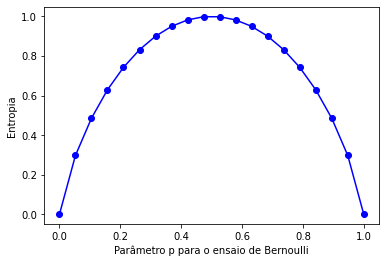

In [3]:
#Função para calcular de determinada distribuição de valores
def calcularEntropia(prob_function):
    entropia = 0
    for i in range(len(prob_function)):
        if(prob_function[i] != 0):
            entropia += prob_function[i]*np.log2(prob_function[i])
    return -entropia

#Para calculo da entropia, usaremos um ensaio de Bernoulli onde a nossa variável aleatória assume os valores, 0 e 1
#com as probabilidades (1 - p) e p, respectivamente.
#Note que o ensaio de Bernoulli, nos da uma distribuição diferente para cada valor de p, consequentemente, a entropia
#para cada uma dessas distribuições será diferente.
x = np.linspace(0,1, 20)
y = [calcularEntropia([1 - p, p]) for p in x]
plt.plot(x, y, '-bo')
plt.xlabel("Parâmetro p para o ensaio de Bernoulli")
plt.ylabel("Entropia")
plt.show

<p>Acima vemos um exemplo do gráfico da entropia, para os diferentes valores do parâmetro p em um ensaio de Bernoulli. É possível perceber que quando $p = 0$ ou $p = 1$, a entropia é 0, o que intuitivamente, faz total sentido, uma vez que, nesses casos o ensaio de Bernoulli só tem 0 ou 1 como resultado, ou seja, não existe incerteza sobre a distribuição.</p>
<p>Além disso, temos que a entropia é maxima quando $p = 0.5$, que é exatamente quando os valores 0 e 1 estão igualmente distribuidos, ou seja, a incerteza sobre qual dos dois valores teremos como resultado será máxima.</p>

# Informação Mútua

<p>Além do conceito de <b>Entropia</b>, precisamos também entender como funciona a <b>Informação Mútua</b>:</p>
<br>
\begin{equation}
I(X,Y) = H(X) - H(X|Y)
\end{equation}
<p>Perceba que agora introduzimos uma espécie de <b>Entropia Condicional</b> $H(X|Y)$, antes de falarmos sobre isso, vamos entender a intuição por trás da <b>Informação Mútua</b>, estamos calculando o quanto foi reduzido na entropia de X, quando a condicionamos a variável aleatória Y. Em outras palavras o quanto condicionar X a Y, diminuiu a incerteza de X.</p>
<p>A partir disso, podemos perceber que Informação Mútua é uma medida de dependência entre variáveis aleatórias, em outras palavras se temos uma grande redução na incerteza de X, quando condicionamos o valor de X a Y, podemos afirmar que Y explica muito bem X.</p>

***

<p>A <b>Entropia Condicional</b> $H(X|Y)$, vem da definição de <b>Entropia</b>, apresentada anteriormente, pela esperança de uma função de variáveis aleatória:</p>
<br>
\begin{equation}
H(X|Y) = E\left[\frac{1}{log_2(P(X = x | Y = y))} \right] = - E\left[log_2(P(X = x | Y = y)) \right] 
\end{equation}
\begin{equation}
= - \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} P(X = x, Y = y)\cdot log_2(P(X = x | Y = y))
\end{equation}
<p>Sendo $ \mathcal{Y}$ e $\mathcal{X}$, os espaços de estados das variáveis aleatórias Y e X respectivamente.</p>

<p>Agora que conhecemos a <b>Entropia Condicional</b>, podemos chegar em uma fórmula melhor para a Informação Mútua:</p>
<br>
\begin{equation}
I(X,Y) = H(X) - H(X|Y) = - \sum_{x \in \mathcal{S}} P(X = x) log_2(P(X = x))  - \left(- \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} P(X = x, Y = y)\cdot log_2(P(X = x | Y = y)) \right)
\end{equation}
\begin{equation}
= - \sum_{x \in \mathcal{X}} P(X = x) log_2(P(X = x))  + \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} P(X = x, Y = y)\cdot log_2(P(X = x | Y = y))
\end{equation}
\begin{equation}
= - \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} P(X = x, Y = y) \cdot log_2(P(X = x))  + \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} P(X = x, Y = y)\cdot log_2(P(X = x | Y = y))
\end{equation}
\begin{equation}
= \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} P(X = x, Y = y) \cdot log_2\left(\frac{P(X = x | Y = y)}{P(X = x)}\right)
\end{equation}
\begin{equation}
I(X, Y)= \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} P(X = x, Y = y) \cdot log_2\left(\frac{P(X = x, Y = y)}{P(X = x)P(Y = y)}\right)
\end{equation}

Onde a segunda para a terceira igualdade, vem do fato que:
<br>
<br>
\begin{equation}
P(X = x) = \sum_{y \in \mathcal{Y}} P(X = x|Y = y)P(Y=y) = \sum_{y \in \mathcal{Y}} P(X = x,Y = y)
\end{equation}
O resultado acima é a aplicação da Lei da Probabilidade Total.

<p>
Sendo assim, chegamos num resultado fechado para a informação mútua:
    <br><br>
\begin{equation}
    I(X, Y)= \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} P(X = x, Y = y) \cdot log_2\left(\frac{P(X = x, Y = y)}{P(X = x)P(Y = y)}\right)
\end{equation}
</p>

# Árvores de decisão
Uma árvore de decisão é uma estrutura de relação entre as categorias. Cada um do nós de uma Árvore de Decisão representa uma espécie de "teste" em determinada <i>feature</i>, as relações entre cada um dos nós ("ramos" da árvore) representam determinado valor que aquele <i>feature</i> pode assumir.

---

Para melhor entendimento, usaremos o seguinte dataset como exemplo, ele contém dados sobre como o tempo estava em determinado dia e se pessoas jogaram tênis naquele dia em específico ou não.<br>
A coluna Outlook contém os valores <b>Ensolarado</b>, <b>Nublado</b> e <b>Chuvoso</b>.<br>
A coluna Temperature contém os valores <b>Quente</b>, <b>Morno</b> e <b>Frio</b>.<br>
A coluna Humidity contém os valores <b>Alta</b> e <b>Normal</b>.<br>
A coluna Wind contém os valores <b>Forte</b> e <b>Fraco</b>.<br>
A coluna PlayTennis contém os valores <b>Sim</b> e <b>Não</b>, indicando se tennis foi ou não jogado naquele dia.<br>

In [4]:
col_names = ['Outlook','Temperature','Humidity','Wind','PlayTennis']

exemplo = pd.read_csv("exemplo_arvore.csv", header=None, names=col_names)
exemplo.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


Pode-se observar uma possível árvore de decisão para este dataset na figura abaixo.<br> Observe que estamos decidindo se iremos jogar tênis ou não, baseado nas informações meteorológicas que temos.<br>


![arvore_jogartennis](decision_tree.png)

A árvore de decisão acima, nos diz que:<br>
Caso o tempo esteja ensolarado, jogaremos tênis se a umidade estiver normal, caso esteja alta, não jogamos.<br>
Caso o tempo esteja Nublado, jogaremos tênis.<br>
Caso o tempo esteja Chuvoso, jogaremos tênis se o vento estiver fraco, caso esteja forte, não jogamos.<br>

Observe que quando queremos modelar um problema, que quando a coluna <i>target</i>, no exemplo acima 'PlayTennis', pode assumir somente dois valores, temos uma função booleana.<br>
No caso acima podemos mapear:<br>
No $\rightarrow$ False <br>
Yes $\rightarrow$ True <br>
E assim, construir uma tabela verdade para a árvore de decisão acima:
<table>
  <tr>
    <th>Outlook = Sunny</th>
    <th>Outlook = Overcast</th>
    <th>Outlook = Rain</th>
    <th>Humidity = High</th>
    <th>Humidity = Normal</th>
    <th>Wind = Strong</th>
    <th>Wind = Weak</th>
    <th>PlayTennis</th>
  </tr>
  <tr>
    <td>True</td>
    <td>False</td>
    <td>False</td>
    <td>True</td>
    <td>False</td>
    <td>False</td>
    <td>False</td>
    <td>False</td>
  </tr>
  <tr>
    <td>True</td>
    <td>False</td>
    <td>False</td>
    <td>False</td>
    <td>True</td>
    <td>False</td>
    <td>False</td>
    <td>True</td>
  </tr>
  <tr>
    <td>False</td>
    <td>True</td>
    <td>False</td>
    <td>False</td>
    <td>False</td>
    <td>False</td>
    <td>False</td>
    <td>True</td>
  </tr>
  <tr>
    <td>False</td>
    <td>False</td>
    <td>True</td>
    <td>False</td>
    <td>False</td>
    <td>True</td>
    <td>False</td>
    <td>False</td>
  </tr>
  <tr>
    <td>False</td>
    <td>False</td>
    <td>True</td>
    <td>False</td>
    <td>False</td>
    <td>False</td>
    <td>True</td>
    <td>True</td>
  </tr>
</table>  
Muitas linhas da tabela acima foram omitidas, caso o contrário, tal tabela seria gigantesca. Mais especificamente, como temos 7 colunas usadas para classificação, e cada uma delas pode assumir dois valores True ou False. Temos $2^7 = 128$ possíveis combinações de valores, ou seja, essa tabela verdade completa, teria 128 linhas.

# O problema com a melhor Árvore de Decisão
Tendo definido como funciona uma árvore de decisão, é fácil observar que modificando as <i>features</i> que escolhemos para determinados nós, temos diferentes árvores.<br>
A partir dessa observação, podemos ver que existem várias árvores de decisão para o mesmo problema, no exemplo acima, a árvore de decisão é construida usando 7 atributos ('Outlook = Sunny', 'Outlook = Overcast', 'Outlook = Rain', 'Humidity = High', 'Humidity = Normal', 'Wind = Strong' e 'Wind = Weak') e vimos que a tabela verdade para esta árvore teria $2^7$ linhas.<br>
Observe que dado determinado número de atributos, digamos $n$, para uma única árvore de decisão $T$, a tabela verdade de $T$ teria $2^n$ linhas.<br>

Intuitivamente se pegássemos somente a coluna da classificação 'PlayTennis', teríamos um vetor de $2^n$ elementos, como observado abaixo:
<table>
  <tr>
    <th>PlayTennis</th>
  </tr>
  <tr>
    <td>False</td>
  </tr>
  <tr>
    <td>True</td>
  </tr>
  <tr>
    <td>True</td>
  </tr>
  <tr>
    <td>False</td>
  </tr>
  <tr>
    <td>True</td>
  </tr>
  <tr>
    <td>...</td>
  </tr>
</table>  
Diferentes árvores de decisão, que resolvem o mesmo problema, usam os mesmos atributos para classificação, a única coisa que muda nessas árvores, é a própria classificação. Ou seja, para todas as diferentes árvores de decisão possíveis, temos a mesma tabela verdade, com exceção da coluna <i>target</i>, no nosso exemplo a coluna 'PlayTennis'.<br>

Ou seja, a quantidade total de árvores de decisão para determinado problema, é a combinação total de valores que cada um dos elementos da coluna <i>target</i> na tabela verdade pode assumir. Como o vetor gerado pela coluna <i>target</i> é um vetor de $2^n$ elementos (sendo $n$ o número de atributos), temos que cada um dos elementos desse vetor pode assumir um valor (True ou False), sendo assim, o total de combinações possíveis é $2^{2^n}$.<br>
Sendo assim, no exemplo acima, como estamos usando 7 atributos, teriamos $2^{2^7} = 3.4 \cdot 10^{38}$ possíveis árvores de decisão que podem ser construídas (e nem consideramos todos os possíveis atributos para se jogar tennis).<br>

Para determinar qual a melhor árvore de decisão, precisariamos iterar por todas as $3.4 \cdot 10^{38}$ possíveis árvores e ver qual a que melhor classifica o nosso <i>target</i> 'PlayTennis'. É, definitivamente inviável iterar por tantas árvores, e por isso precisamos de uma espécie heurística que nos ajudar a estimar uma árvore que seja boa o suficiente.

# Como encontrar uma árvore "boa"

Note que usamos o termo "boa", entre aspas, pois estamos montando um algoritmo para encontrar uma árvore que é boa e não ótima (como visto anteriormente a árvore ótima é um problema intratável).<br>
A ideia é colocar os atributos mais importantes mais próximos ao topo da árvore, enquanto atributos menos importantes ficam nas camadas mais baixas. Por "atributos mais importantes" nos referimos aos atributos que classificam melhor o nosso <i>target</i>. <br>

Por exemplo, no problema acima, vemos que o atributo 'Outlook = Overcast', classifica muito bem o 'PlayTennis', visto que, em todos os casos onde 'Outlook = Overcast' temos 'PlayTennis' como True, em outras palavras, condicionar 'PlayTennis' à 'Outlook = Overcast', reduz a incerteza (ou <b>entropia</b>) em 'PlayTennis'.<br>
Para estruturar o algoritmo, ao invés de escolhermos os atributos que melhor classificam o <i>target</i>, escolheremos as <i>features</i>, como visto anteriormente, temos que as <i>features</i> são os nós das árvores e os atributos as arestas entre os nós.<br>

Além disso, temos uma ótima maneira de determinar quanto de incerteza em uma variável aleatória é reduzido, quando a condicionamos a outra, e esta é a <b>Informação Mútua</b>.<br>

No exemplo de 'PlayTennis', para escolher a <i>feature</i> que melhor classifica 'PlayTennis', calcularíamos I(PlayTennis, Outlook), I(PlayTennis, Humidity), I(PlayTennis, Wind) e I(PlayTennis, Temperature) e escolheríamos a <i>feature</i> que máxima a <b>Informação Mútua</b>.<br>

Depois de decidida a primeira <i>feature</i> que usaremos para classificar o <i>target</i>, usaremos tal <i>feature</i>, para quebrar o nosso dataset em $n$ datasets, onde $n$ é o número de atributos na <i>feature</i> escolhida.<br>

Aplicando essa ideia ao exemplo de 'PlayTennis', supondo que <i>feature</i> escolhida seja 'Humidity', que tem dois atributos associados a ela ('High' ou 'Normal'), construiremos dois dataframes que juntos formam o dataframe original, em um deles teremos todas as linhas do dataframe original em que 'Humidity = High' e no outro teremos todas as linhas do dataframe original em que 'Humidity = Normal'.<br>

Usando os <i>dataframes</i> gerados, a partir da quebra do <i>dataframe</i> original, realizaremos o mesmo processo de classificação, escolhendo a melhor <i>feature</i> que classifica 'PlayTennis' em cada um dos dataframes gerados. Note que assim que o dataframe original é quebrado em $n$ dataframes, cada um desses novos <i>dataframes</i> é um novo problema de árvore de decisão, com menos exemplos (ou linhas) e uma <i>feature</i> a menos.

Realizamos tal processo de quebra de dataframes, até que não tenhamos mais features para usar na classificação, ou até que a <b>entropia</b> em <i>target</i> seja 0, ou seja, todos os valores na coluna <i>target</i> são iguais.


# A árvore de decisão do scikit-learn

Vamos usar o método 'DecisionTreeClassifier' da biblioteca scikit-learn no python, para classificar o nosso dataset de 'PlayTennis'.<br>

In [5]:
X = exemplo.loc[:, exemplo.columns != 'PlayTennis']
y = exemplo.PlayTennis

Os dados do nosso exemplo são categóricos e o classificador de árvore de decisão do scikit não funciona para este tipo de dado. Precisamos preparar os dados antes construir nosso classificador. Para isso vamos usar a função do pandas "pd.get_dummies" que converte os atributos categóricos em atributos com valores 0 e 1.<br>
Por exemplo, o atributo Humidity que pode receber os valores High e Normal, passa a ser representado pelos atributos Humidity_High e Humidity_Normal, que podem receber os valores 0 e 1.<br>
Essas variáveis criadas são chamadas de variáveis dummies, uma variável categorica com $n$ atributos, da origem à $n$ variáveis dummy, uma para cada atributo.<br>

In [6]:
X_dummy = pd.get_dummies(X) #transformando o dataset
X_dummy.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1


E na seguinte célula, criamos a classe para o classificador de Árvores de Decisão do scikit-learn, além de usar o método 'fit' para 'treinar' a árvore aos dados disponibilizados

In [7]:
# Criação do classificador de árvore de decisão 
clf = DecisionTreeClassifier(criterion="entropy")

# Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
clf = clf.fit(X_dummy, y)

In [ ]:
clf.predict(X_dummy)

Podemos usar o método 'plot_tree', também da biblioteca sklearn para vizualizar a árvore.

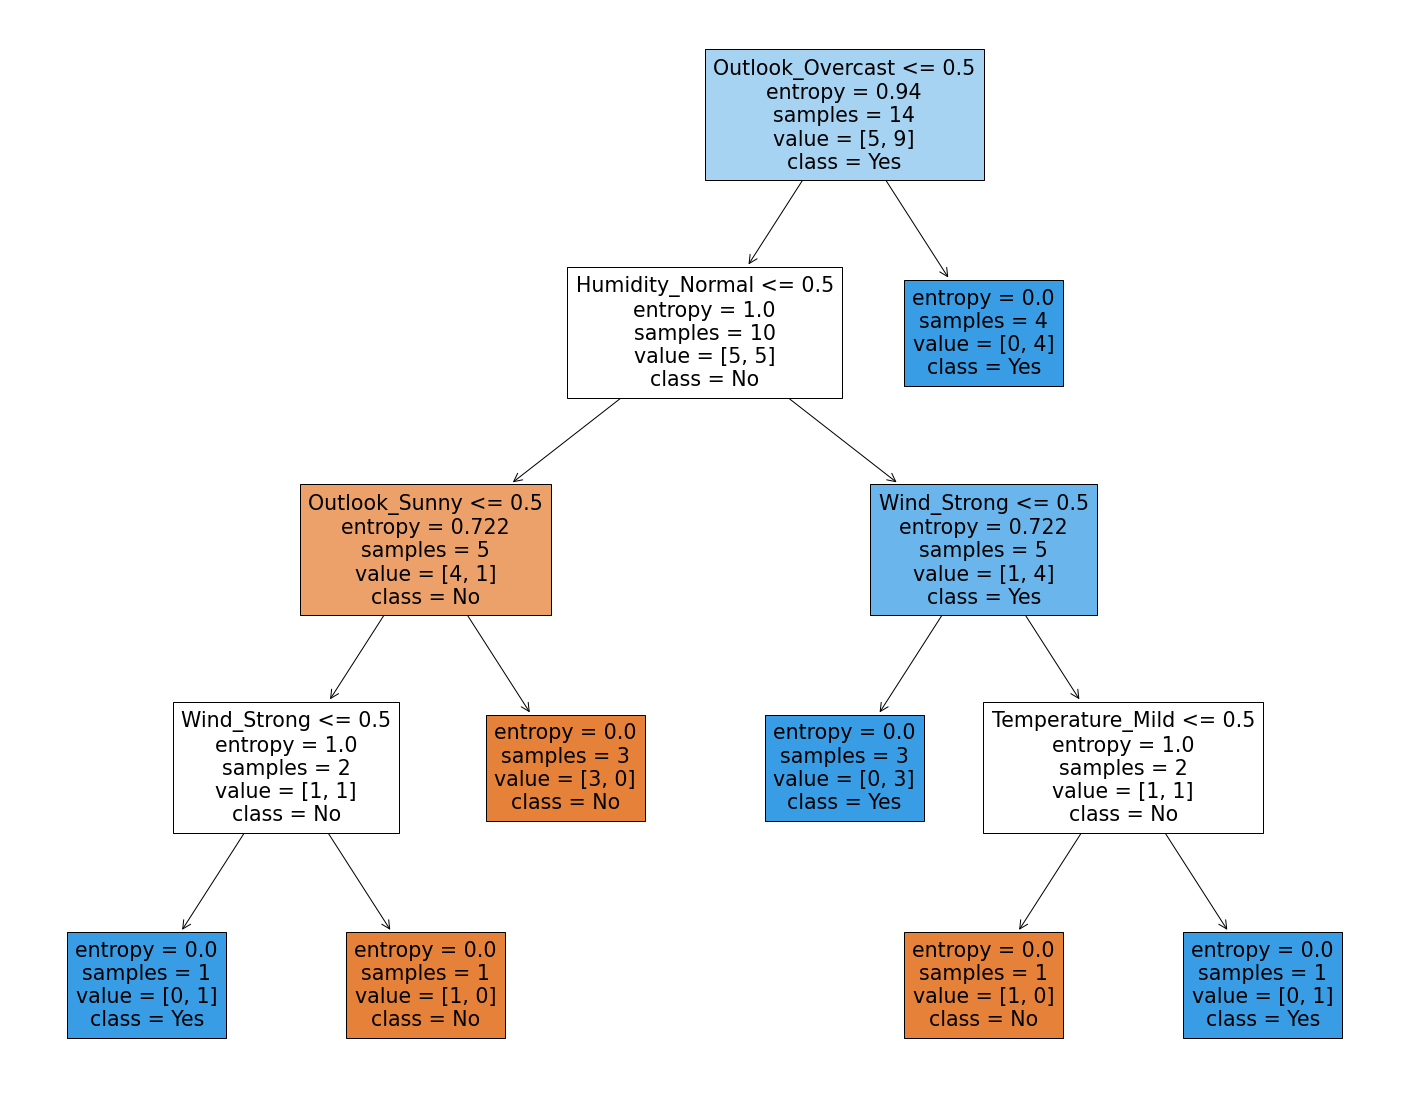

In [8]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, feature_names=X_dummy.columns, class_names=list(y.unique()), filled=True)


# Florestas Aleatórias

Como dito anteriormente, as Árvores de Decisão são construidas com base em uma heurística de qual é a melhor árvore. Uma vez que essa construção é por meio de uma heurística, não temos garantia de que essa árvore é, de fato, a melhor árvore, na verdade, existem outras heurística para a construção de uma Árvore de Decisão, o que foi apresentado anteriormente, é apenas uma delas. <br>
A partir dessa ideia de que podemos ter diversas Árvores de Decisão que sejam capazes de classificar o <i>target</i>, surge a noção de <b>Florestas Aleatórias</b>.<br>

---

A ideia por trás das Florestas Aleatórias, está em gerar diferentes Árvores de Decisão, que conferem diferentes classificações do <i>target</i>, e assim fazer-las "votar" na melhor classificação. 

Para começar a construção de uma Floresta Aleatória, inicialmente decidimos a quantidade de árvores que estarão presentes naquela floresta.<br>
Após decidir quantas árvores irão compor a floresta, geraremos um dataset a partir do original, selecionando amostras do dataset original aleatoriamente, as quais estarão presentes nesse novo dataset. Essa técnica se chama <i>Bagging</i> .<br> Um dataset para cada Árvore na Floresta será gerado a partir do <i>Bagging</i>, estes serão usados para treinar a árvore, ao qual tal dataset está relacionado.<br>
Existem varias maneiras de se escolher diferentes heurísticas para gerar as Árvores de Decisão em uma Floresta Aleatória. O padrão da biblioteca 'sklearn', é selecionar a cada iteração um número limitado de <i>features</i> que podem compor o nó da árvore na iteração corrente.<br>
No sklearn, é possível definir uma constante $n$, de maneira que a cada iteração o algoritmo pode escolher somente $n$ <i>features</i> selecionadas aleatoriamente, ou definir, uma função do número de <i>features</i> disponíveis.<br>
Por exemplo, sendo $n$ o número de <i>features</i> disponíveis em uma iteração, o padrão do 'sklearn', é selecionar $\sqrt{n}$ <i>features</i> que podem ser escolhidas para aquele nó.

# A Floresta Aleatória do scikit-learn

Vamos usar o método 'RandomForestClassifier' da biblioteca scikit-learn no python, para classificar o nosso dataset de 'PlayTennis'.

In [9]:
# Criação do classificador de floresta aleatória.
#O parâmetro n_estimators diz quantas árvores serão geradas.
#O parâmetro bootstrap está dizendo para o algoritmo realizar o processo de Bagging para cada árvore gerada.
#O parâmetro max_features diz o máximo de features a cada execução, no caso, o máximo será a raiz quadrada
#do número de features disponível
#O parâmetro criterion diz respeito ao critério ultilizado para construir a árvore, no caso Entropia/Informação Mútua.
clf = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features="sqrt", criterion="entropy")

# Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
clf = clf.fit(X_dummy, y)

In [ ]:
clf.predict(X_dummy)

A floresta gerada é composta por 100 árvores (parâmetro que pode ser modificado em 'n_estimators'), por isso não é possível vizualizar todas as árvores na floresta, dessa forma, escolheremos uma única árvore para mostrar.

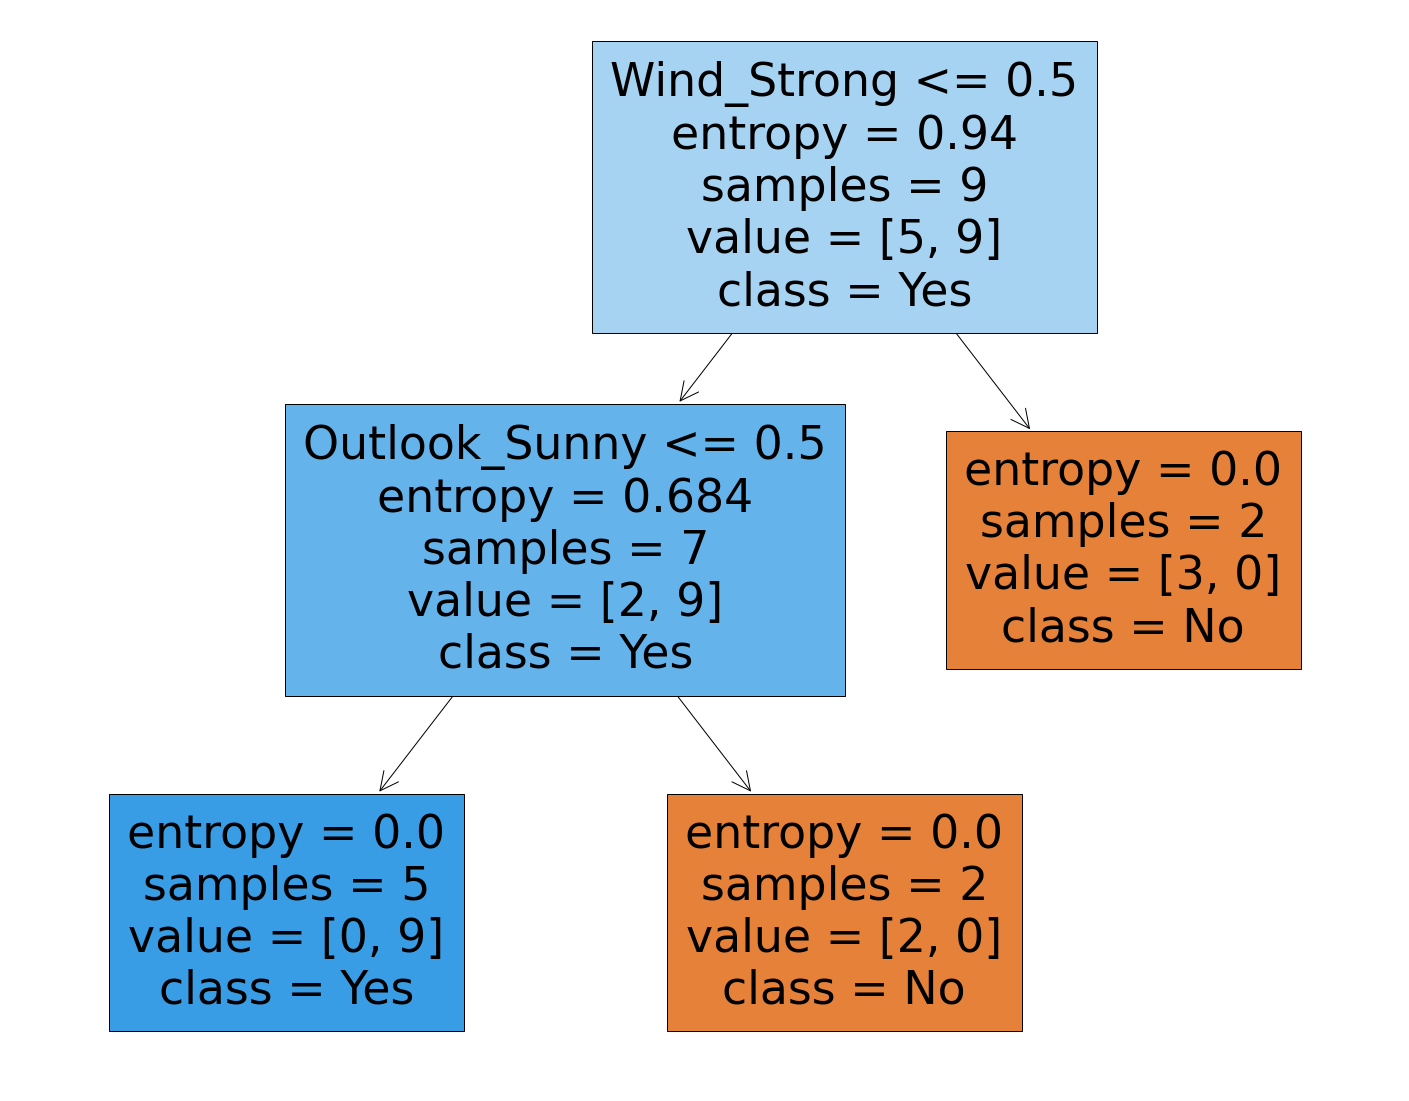

In [11]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf.estimators_[25], feature_names=X_dummy.columns, class_names=list(y.unique()), filled=True)